# Seaborn

+ é uma lib de visualiazção de dados estatiscos
+ tem a vantagem de suportar DataFrame do Pandas (PAnel DAtaS)
+ Seus stilos visuais sao muito bonitos
+ Ela é escrita sobre o matplot
    + Enquanto o matplot é mais ideal para graficos 2D de eixo x/y, o seaborn é melhor para outro graficos mais bonitos
+ COm ele, em uma unica linha de código consigo identifica uma regressao linear entre dois parametros
##### Links
+ https://seaborn.pydata.org/examples/index.html
+ Cores: https://matplotlib.org/examples/color/colormaps_reference.html



--- ---
# Aula 1  - Plots de Distribuições
Vamos discutir alguns gráficos que nos permitem visualizar a distribuição de um conjunto de dados. Esses plots são:

* distplot = gera um histogram de uma coluna (frequencia dos dados)
* jointplot = grafico para regressao linear (verificar a relaçao entre duas variaveis
* pairplot = faz os dois anteirores para todaos os dados mnumericos ou nao
* rugplot = ultip para o kdeplot
* kdeplot = faz curva KDE (Uma distribuiçao baseada na somatoria de varias dist. normais sobre sesus dados)

In [1]:
# import seaborn e 
import seaborn as sns
# matplot _line (para ver as visualizçoes na lionmha par anao presisa fazer o .show())

In [4]:
# o seaborn já possui agusn data_set dentro de si. Vmaos usálos para exeplo
# tips é um data_set DataFrame (limnnha e colunas do pandas)
#    Eh um data_set de gorjetas dadas
tips = sns.load_dataset('tips')
tips.info() # 244 linhas e 7 colunas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


In [14]:
# msotrando 5 dados (defaul para head)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
### `sns.displot()` : histograma

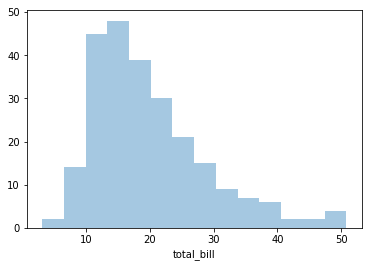

In [13]:
# sns.distplot() = gera um histograma de uma Serie (eixo x = valor e eixo y é a frequencia desse dados em intervalo)
#   @kde => se vai mostrar a linha ou nao
#   @bins => quanta counas voce quer que seja mostrado (pois ele agrupa)
sns.distplot( tips['total_bill'], kde = False)
## Vemos que a maior frequencia de daods (total bill) é no intervalo de [10 a 20]

---
### `sns.jointplot()` : gráfico de distribuição conjunta (relaçao entre duas colunas


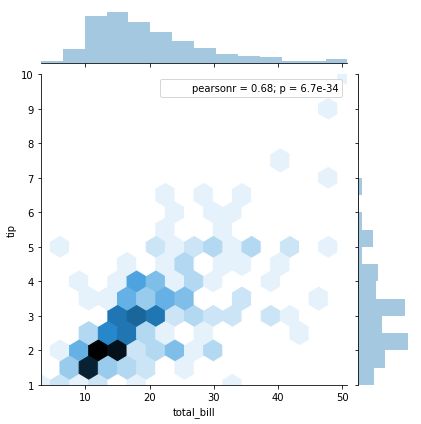

In [19]:
# presia de 3 paramettos
# Obr@x = eixo x (qual a coluna que sera o eixo x) 
# Obr@y = eixo y (qual a coluna que sera o eixo y)
# Obr@data = de onde vem os dados
# Opc@kind = faz outra coisas 
#          input@kind = 'reg' ('reg faz regressao linear)
#          input@kind = 'hex (faz mapa de calor)
sns.jointplot( x = 'total_bill', y='tip', data = tips, kind = 'hex')
# AO observer o grafico, precebemos que ha um relaçao 
#    linear proporcional entre o tamanho total da conta e a gorjeta


---
## `sns.pairplot()` : faz jointplot de tudo que é número no DataFrame, tem os assim varios

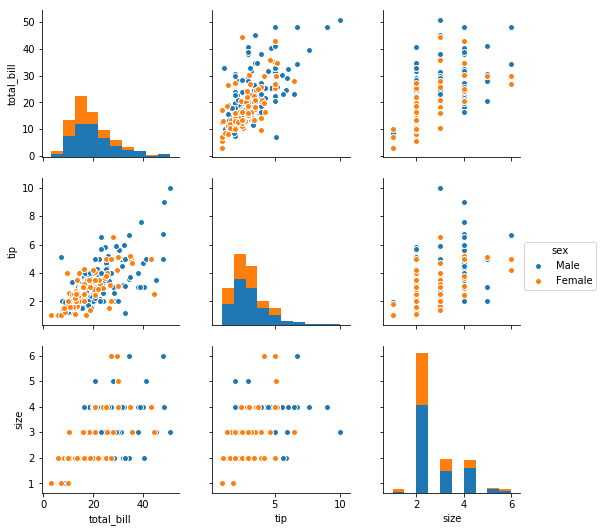

In [21]:
## faz uma matriz com todas os gráficos de dados numéricos
## se uma coluna faz consigo mesmo, gera um histograma
## opc@hue = posso adicionar mais informçaez para considerar
sns.pairplot(tips, hue="sex")

---
## `sns.rugplot()` e `sns.kdeplot()`  criar um KDE

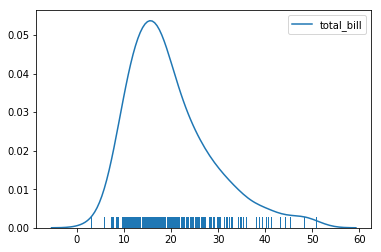

In [24]:
## util para fazer um KDE = útil para estimativa de densidade Kernel (EDK) => criar uma função que representa um histograma
### KDE = Soma das Dsitribuiçoes normais centradas em seus dados
### É uma forma nao parametrica, nao evolve parametros como meida/mediana/variaca/mmoda
### Serve pra quando voce tem dados que voce nao sabe que distribuiçao eles seguem 
### Como funciona :? cria varias distribuiçoes normais e soma elas
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

# Aula 2 : Plot Categoricos (para dados nao numericos)
Agora vamos discutir como usar seaborn para traçar dados categóricos. Existem alguns tipos de argumentos principais para isso:

+ barplot
+ factorplot
+ boxplot
+ violinplot
+ stripplot
+ swarmplot

+ countplot

Vamos passar por exemplos de cada um.

In [26]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## `sns.barplot()`
Esses plots parecidos permitem que você obtenha dados agregados de um recurso categórico. ** barplot ** é um gráfico geral que permite que você agregue os dados categóricos baseados em alguma função, por padrão, a média:

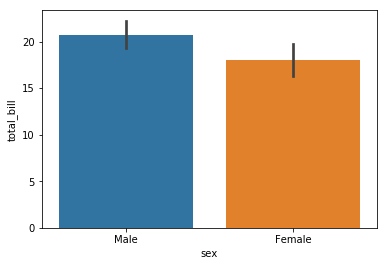

In [31]:
# opc@set
sns.barplot(x='sex', y='total_bill', data=tips)
# sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

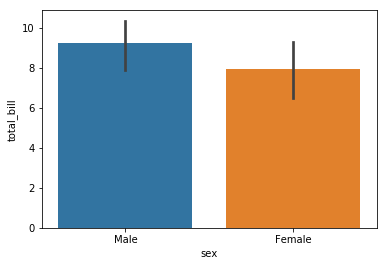

In [30]:
import numpy as np
# passando estimator desviopadrao = ele é represnetado pela reta
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

## `sns.countplot()` : grafico de coluna mostrando a quantidade de um elemento (so presia de uma coluna
Isto é essencialmente o mesmo que o gráfico de barras, exceto que o estimador está explicitamente contando o número de ocorrências. É por isso que apenas passamos o valor x:

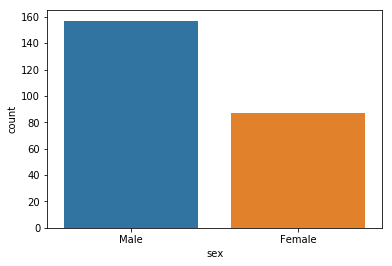

In [33]:
# so presisamos de um unico eixo
sns.countplot(x='sex', data=tips)

## `sns.boxplot() e violinplot()`
Boxplots e violinplots são usados para mostrar a distribuição de dados categóricos. Um boxplot (ou gráfico de caixa e espessura) mostra a distribuição de dados quantitativos de uma maneira que facilita comparações entre variáveis ou entre os níveis de uma variável categórica. A caixa mostra os quartis do conjunto de dados, enquanto as barras se estendem para mostrar o resto da distribuição, exceto pelos pontos que são determinados como "outliers".

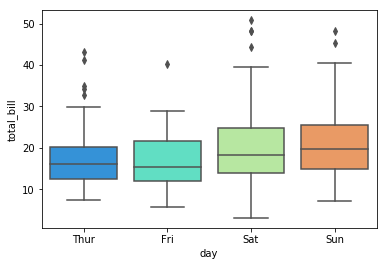

In [35]:
## boxplot
"""
Mos
"""
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')
# sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow', hue='sex')

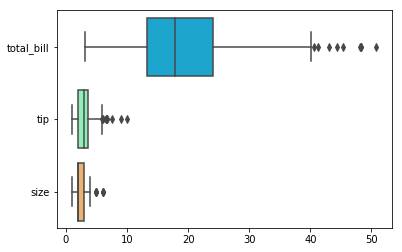

In [36]:
# Podemos orientar os dados para aparecerem na horizontal
sns.boxplot(data=tips,palette='rainbow',orient='h')

## `sns.violinplot()`

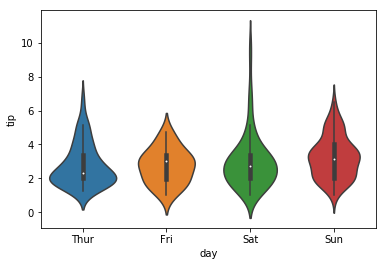

In [37]:
## hue = sex
## split = true (serve quando se usa o hue)
sns.violinplot(x='day', y='tip', data= tips)

## `sns.stripplot()`

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


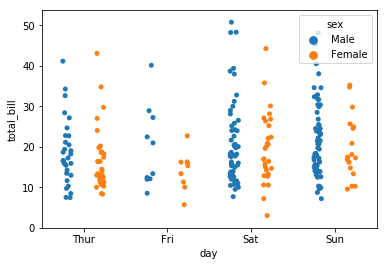

In [38]:
sns.stripplot(x='day', y='total_bill', data=tips, hue='sex', jitter=True, split=True)

## `sns.swarmplot()`

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:2783: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


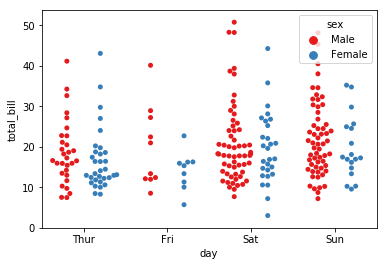

In [40]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

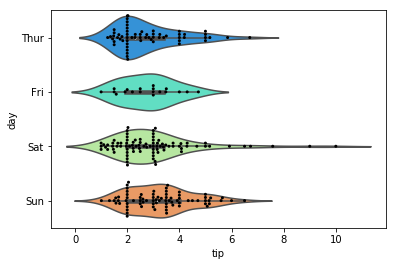

In [41]:
## Usano os dois em conjuto
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## `sns.factorplot()`
+ PERMITE PLOTAR GRAFICO DE UQLER TIPO VISTO ANTERIOREMNTE, PASSADO SEU NOME NUM PARAMETRO
+ O factorplot é a forma mais geral de um plot categórico. Pode aceitar um parâmetro ** kind ** para ajustar o tipo de plotagem:

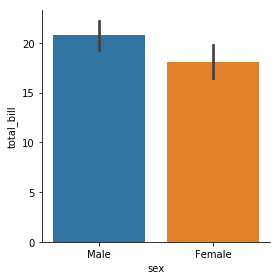

In [42]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

---
# Aula 3 - plot Matricial
Os gráficos matriciais permitem traçar dados como matrizes codificadas por cores e também podem ser usados para indicar clusters dentro dos dados (mais tarde, na seção de Machine Learning, aprenderemos a formatear dados de cluster).

+ heatmap :**útil para voce saber quando os dados staop alto ou baixos de forma visual**
+ clustermap : Fazer clusterizaçao e mapa de calor ao mesmo tempo

Comecemos por explorar o mapa térmico e o clutermap de Seaborn:

In [45]:
## nosso data_set
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [46]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## `sns.heatmpap` : gera mapa de calor de um DataFrame (passa matriz)
Para que um mapa de calor funcione corretamente, seus dados já devem estar em uma forma de matriz e a função sns.heatmap basicamente apenas põe cor pra você. Por exemplo:

In [76]:
# Correlograma
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


**WARNING**: Fazneo um `heatmap()` de tips.corr, com isso, pomdeos identifica quais variaveis estao mais interligadas (a ideia de regressoa, que o valor de uma depende da outra e esse grau 

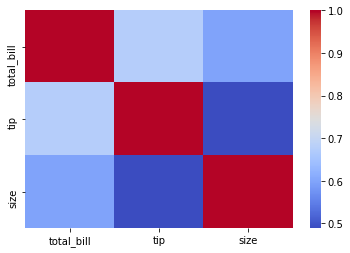

In [52]:
sns.heatmap(tips.corr(), cmap='coolwarm')

### Outro exemplo de `heatmap()`

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


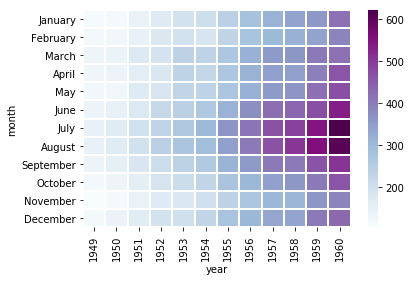

In [55]:
# pivot_table, serve para reestruturar os dados de uma tabela
## tip: nesse caso, estamos colocando como index mes, coluna ano e valor passagenrisp

## sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)
## linecolor = define cor (so aparece se houver linewidht que define grossura)
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights, cmap="BuPu", linewidths=1, linecolor='white')
pvflights

### `clustermap()`
+ Fazer mapa de calor de cluster (agrupamentos que o SW fez)

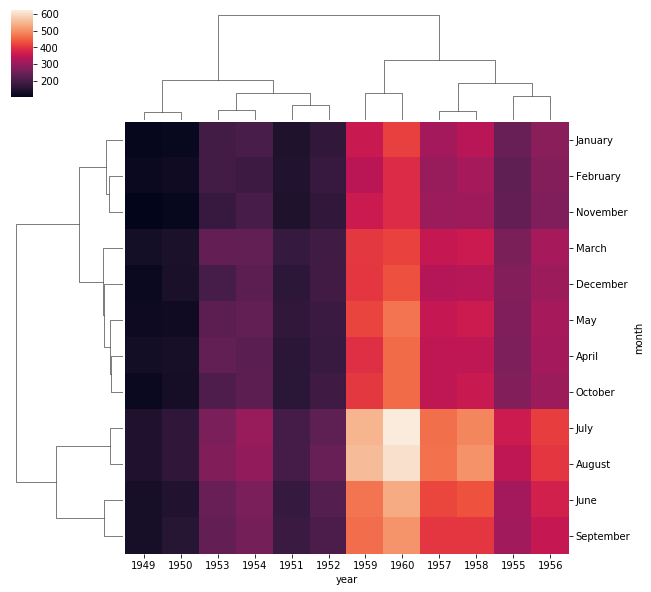

In [59]:
sns.clustermap(pvflights)

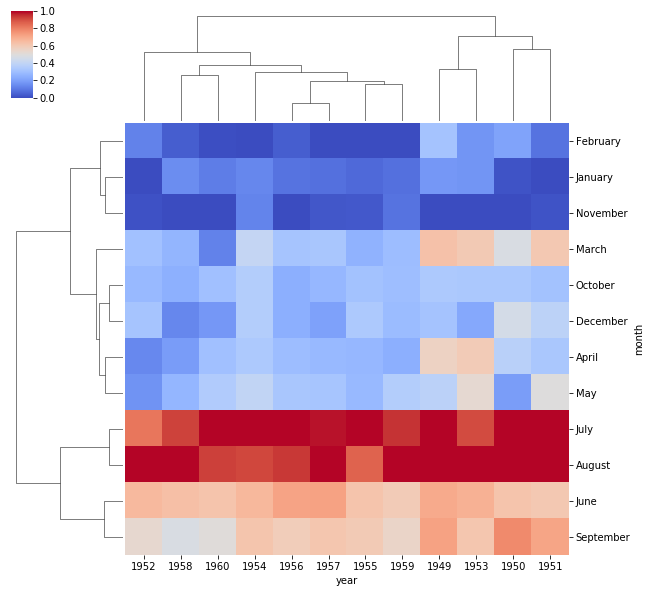

In [58]:
# com @stand_scale = 1 ==> temos uma melhor analise dos dados
sns.clustermap(pvflights, cmap='coolwarm', standard_scale=1)

---
# Aula 4 : plots de regressao
O Seaborn possui muitas ferramentas integradas para plots de regressão, no entanto, não discutiremos a regressão até a seção de Machine Learning do curso, de modo que apenas cobriremos a função ** lmplot () ** **linear model plot** por enquanto.

** lmplot ** permite que você exiba modelos lineares, mas também permite que você divida esses gráficos com base em recursos, além de colorir a matiz de cores com base nos recursos.

**Por que fazer isso** : Voce pode entao prever o futuro

In [60]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## `lmplot()`

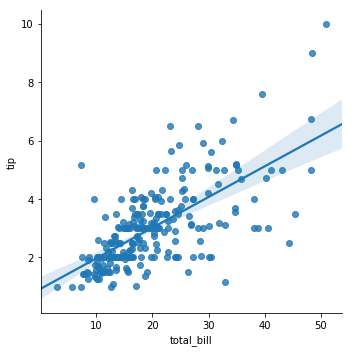

In [62]:
## escolhe x e y e faz modelo linear deles, vimos isso no primeiro mas nela a reta era mais algo opcional
sns.lmplot(x='total_bill',y='tip',data=tips)

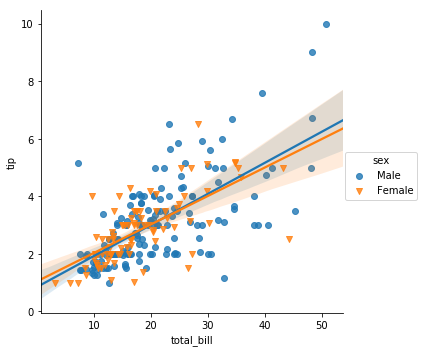

In [64]:
## colocado @hue, faz com que coloque outro parametro
## markesr = o tipo de bolinha
## scatter_kws={'s':100}
sns.lmplot(x='total_bill',y='tip',data=tips, hue='sex', markers=['o','v'])

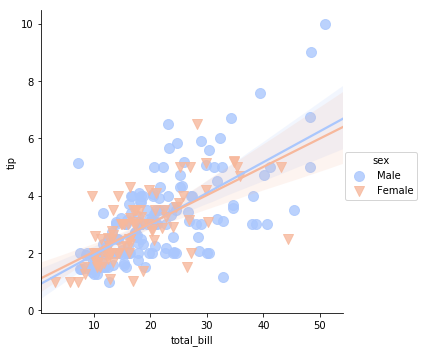

In [65]:
"""
lmplot kwargs são passados através do ** regplot **, que é uma forma mais geral de lmplot ().
O regplot possui um parâmetro scatter_kws é passado para plt.scatter. 
Então, você pode querer definir o parâmetro "s" nesse dicionário, o que corresponde ao tamanho dos marcadores. 
Em outras palavras, você acaba passando um dicionário com os argumentos base do matplotlib, 
neste caso, s para o tamanho do gráfico de dispersão. Em geral, você provavelmente não vai 
se lembrar disso sempre, porém, consulte sempre que achar necessário.
"""
## aumentara tamanho das bolinhas s =100
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

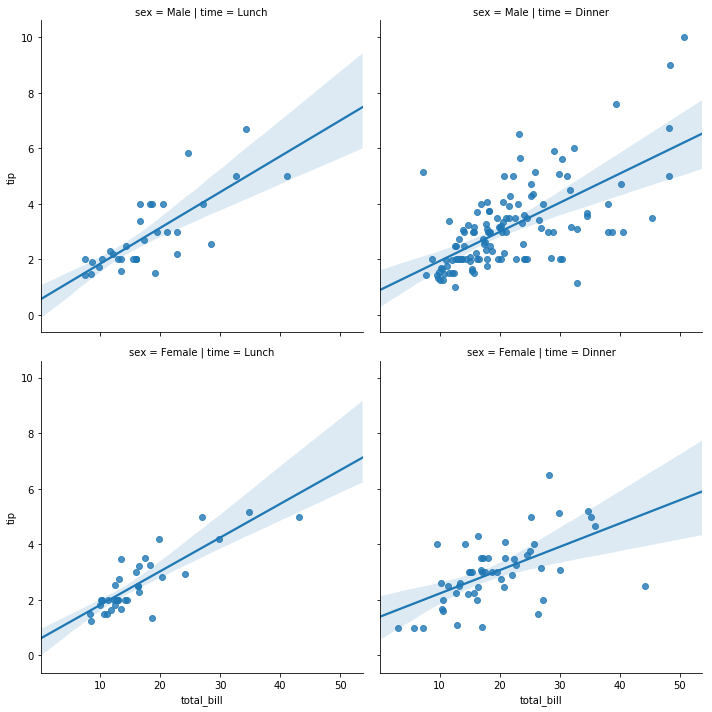

In [66]:
## semelahnte ao hue, aqui vamos criar uma matriz degrfaicos pelos parametros
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

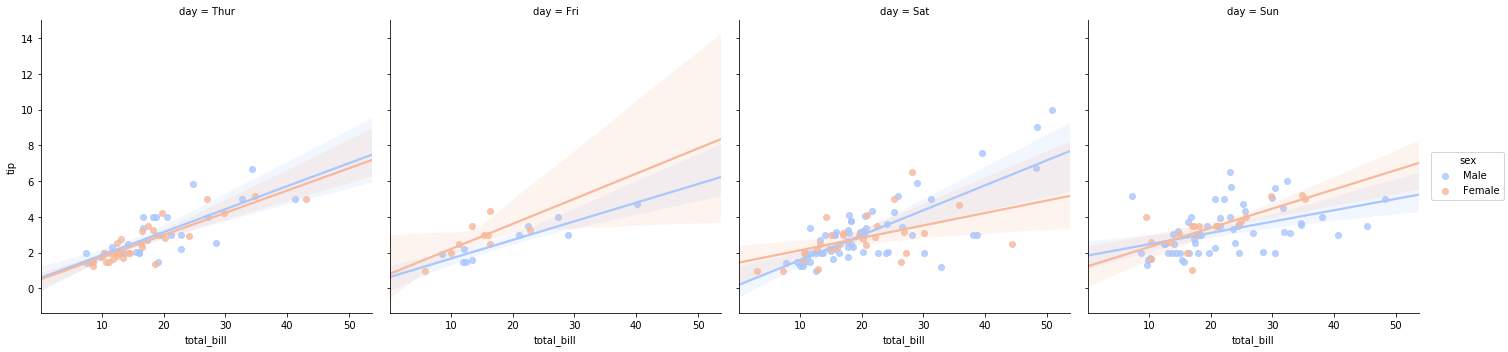

In [67]:
## ouytro exemplo
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

---
# Aula5 : PairPids

Os PairGrids são tipos gerais de gráficos que permitem mapear tipos de plotagem diferentes para linhas e colunas de um grid, isso ajuda você a criar plots similares separadas por categoias.

**Resumindo**: É criar vários plots vazios para serem preencioos da forma que voce quiser

+ **PairGrid** : para dados numericos
+ **FacetGrid** : para dados categoricos (nomes)

In [68]:
## data_set de petalas, muito famosa em machine learing, retirado no começo do seculo XX
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## `PairGrid()`

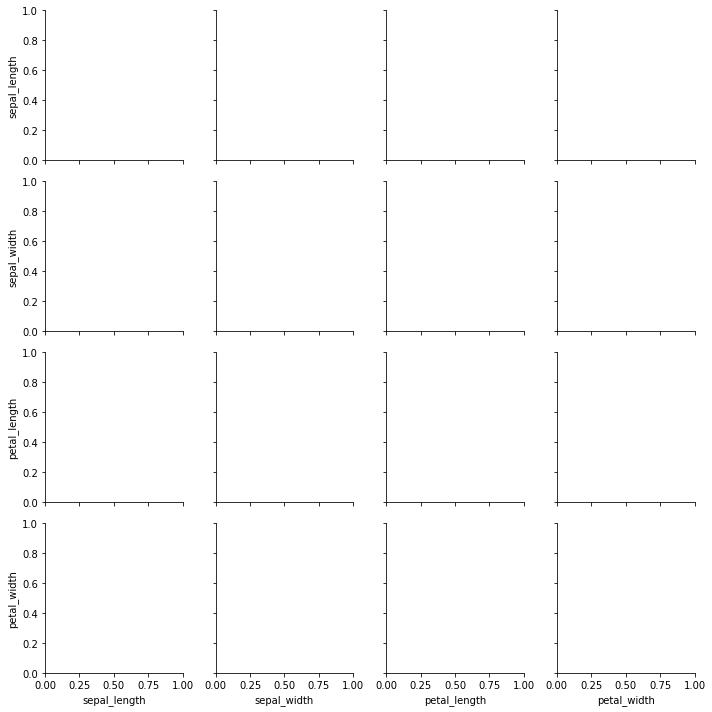

In [70]:
sns.PairGrid(iris)

C:\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


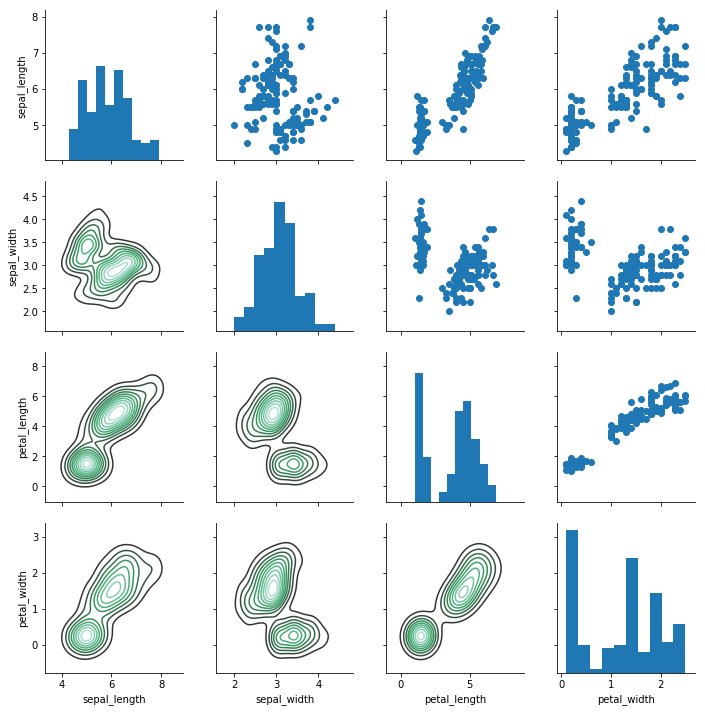

In [73]:
# vamoes entao plotar gradicos nas diagonais
# Altera os tipos de plots na diagonal, parte superior e inferior.
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## `FaceGrid`

In [72]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


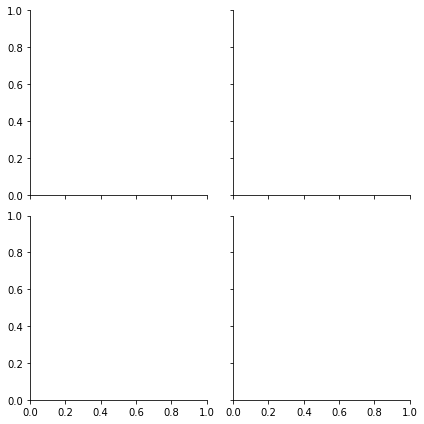

In [74]:
#FaceGrid Vazio
g = sns.FacetGrid(tips, col="time", row="smoker")

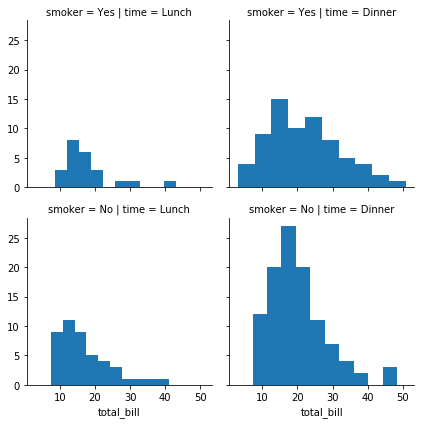

In [75]:
# FaceGrid Preenchido
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")